## Clustering

In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.preprocessing import MinMaxScaler
plt.style.use('seaborn-white')

In [65]:
# Leggiamo il dataframe dal file csv 'clienti.csv'
clienti = pd.read_csv('clienti.csv', sep=',', index_col='CustomerID')
clienti.head(3)

,Imax,Recency,Frequency,MonetaryValue,EntropyProducts
CustomerID,,,,,
12347,676,1,182,4310.00,4.464578
12348,1248,74,27,1437.24,2.987771
12349,630,18,72,1457.55,4.276666


## Hierarchical Clustering

In [66]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

Eseguiamo il clustering gerarchico utilizzando le seguenti tipologie di linkage: complete, single e average. Abbiamo scelto di eseguire prima il clustering gerarchico per ottenere una stima iniziale del valore di K da utilizzare con l'algoritmo K-Means.

### Linkage: COMPLETE

In [67]:
scaler = MinMaxScaler()
X = scaler.fit_transform(clienti.values)
# Calcoliamo le distanze
data_distance = pdist(X, metric='euclidean')

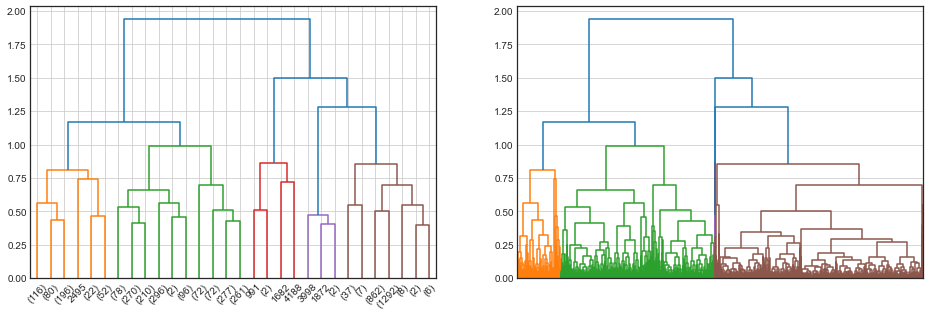

In [68]:
# Scegliamo il metodo da usare
data_linkage = linkage(data_distance, method='complete', metric='euclidean')

# Creiamo la figura che contiene i due dendrogrammi, uno troncato e uno intero
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(16)

# Plottiamo il dendrogramma (trocato)
axes[0].grid()
axes[1].grid()
res_1 = dendrogram(data_linkage, color_threshold=1.0, truncate_mode='lastp', ax=axes[0])
# Plottiamo il dendrogramma (tutto intero)
res_2 = dendrogram(data_linkage, color_threshold=1.0, no_labels=True, ax=axes[1])

Se "tagliamo" il dendrogramma ad altezza 1.2 otteniamo 6 cluster. Tuttavia alcuni cluster ottenuti sono di piccole dimensioni (i due cluster prima e dopo quello giallo, che sono praticamente delle linee verticali).
Invece, se tagliamo il dendrogramma ad altezza 1.51 (circa) otteniamo 4 cluster, anche in questo caso abbiamo un cluster (il cluster prima di quello giallo, che è praticamente una linea verticale) molto più piccolo rispetto agli altri.

### Linkage: SINGLE

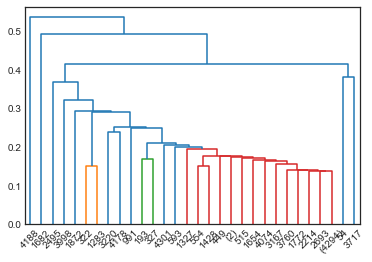

In [69]:
# Scegliamo il metodo da usare
data_linkage = linkage(data_distance, method='single', metric='euclidean')

# Plottiamo il dendrogramma (trocato)
res = dendrogram(data_linkage, color_threshold=0.2, truncate_mode='lastp')

# Dato che il dendrogramma non sembra essere significativo, non plottiamo quello per intero

Utilizzando il linkage single, il clustering non sembra essere significativo.

### Linkage: AVERAGE

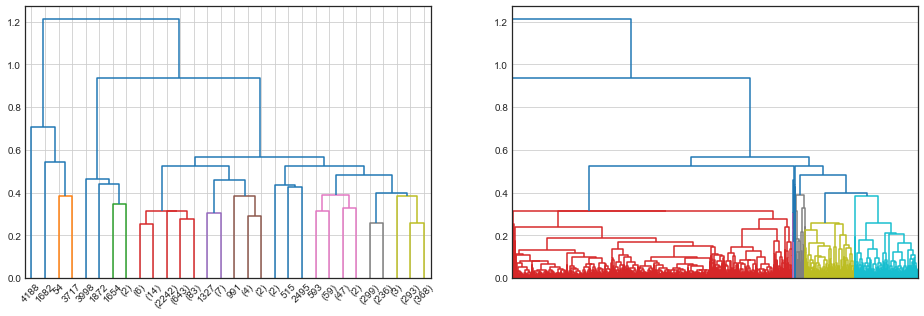

In [70]:
# Scegliamo il metodo da usare
data_linkage = linkage(data_distance, method='average', metric='euclidean')

# Creiamo la figura che contiene i due dendogrammi, uno troncato e uno intero
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(16)

axes[0].grid()
axes[1].grid()

# Plottiamo il dendrogramma (trocato)
res_1 = dendrogram(data_linkage, color_threshold=0.4, truncate_mode='lastp', ax=axes[0])
# Plottiamo il dendrogramma (tutto intero)
res_2 = dendrogram(data_linkage, color_threshold=0.4, no_labels=True, ax=axes[1])

Se "tagliamo" il dendrogramma ad altezza 0.6 otteniamo 4 cluster. In questo caso abbiamo un cluster (il primo cluster, che è praticamente una linea verticale) molto più piccolo rispetto agli altri.

Dei possibili valori di K da utilizzare nell'algoritmo K-means potrebbero essere 2, 3, 4, 5, 6. Abbiamo deciso di includere i valori 2 e 3 perché nei dendogrammi analizzati precedentemente c'erano dei cluster che erano molto piccoli e forse non significativi.

## K-Means

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics

### Knee Method per stimare K

Per stimare il valore migliore del parametro K, ossia il numero di cluster, utilizziamo il Knee Method, calcolando le metriche SSE, silhouette e separation.

In [72]:
# sse_list[i] indica il valore di SSE usando K=i
sse_list = list()
# silhouette_list[i] indica il valore di silhouette usando K=i
silhouette_list = list()
# separation_list[i] indica il valore di separation usando K=i
separation_list = list()
# Proviamo k = 2, 3, ..., 10
max_k = 10
for k in range(2, max_k + 1):
    # Facciamo il KMeans con K=k
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300)
    kmeans.fit(X)
    # Aggiungiamo alle liste definite sopra i rispettivi valori
    sse_list.append(kmeans.inertia_)
    silhouette_list.append(silhouette_score(X, kmeans.labels_))
    separation_list.append(metrics.davies_bouldin_score(X, kmeans.labels_))

Plottiamo i grafici di SSE, silhouette e separation.

[Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10')]

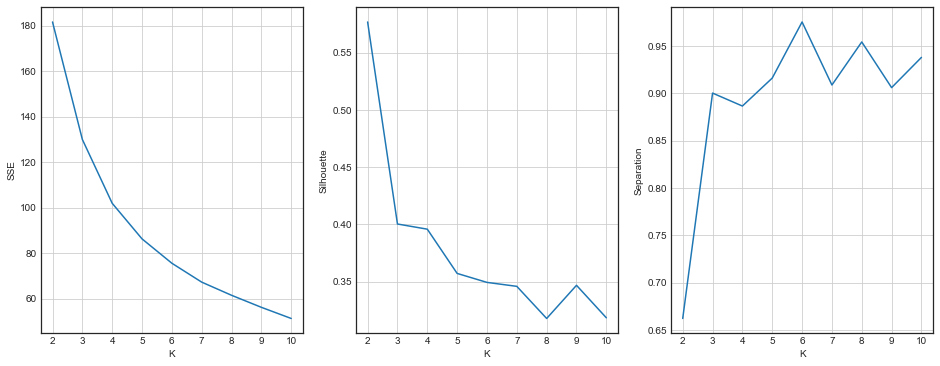

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(6)
fig.set_figwidth(16)

x = [2, 3, 4, 5, 6, 7, 8, 9, 10]
x_labels = ['2', '3', '4', '5', '6', '7', '8', '9', '10']

axes[0].plot(range(2, len(sse_list) + 2), sse_list)
axes[0].set(xlabel='K', ylabel ='SSE')
axes[0].grid()
axes[0].set_xticks(x)
axes[0].set_xticklabels(x_labels)


axes[1].plot(range(2, len(silhouette_list) + 2), silhouette_list)
axes[1].set(xlabel='K', ylabel ='Silhouette', )
axes[1].grid()
axes[1].set_xticks(x)
axes[1].set_xticklabels(x_labels)

axes[2].plot(range(2, len(separation_list) + 2), separation_list)
axes[2].set(xlabel='K', ylabel ='Separation')
axes[2].grid()
axes[2].set_xticks(x)
axes[2].set_xticklabels(x_labels)

Dai grafici si ottiene che il valore migliore di K è 3. Infatti, osservando i grafici si nota che la silhouette ha valore massimo in K=3, la separation ha valore minimo in K=3 e per valori di K > 3 il valore dell'SSE decresce più lentamente.

## Grafici con K = 3

In [74]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=3)

In [75]:
# Contiamo quanti elementi ci sono in ogni cluster
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([1923,  977, 1424], dtype=int64))

In [76]:
# Assegnamo ad ogni cluster un colore diverso
colors = {0: 'red', 1: 'green', 2: 'blue'}
# Assegnamo ad ogni label il rispettivo colore
c = [colors[label] for label in kmeans.labels_]

In seguito sono riportati gli scatter plot di tutte le possibili coppie di attributi.

[Text(0, 0.5, 'EntropyProducts'), Text(0.5, 0, 'Imax')]

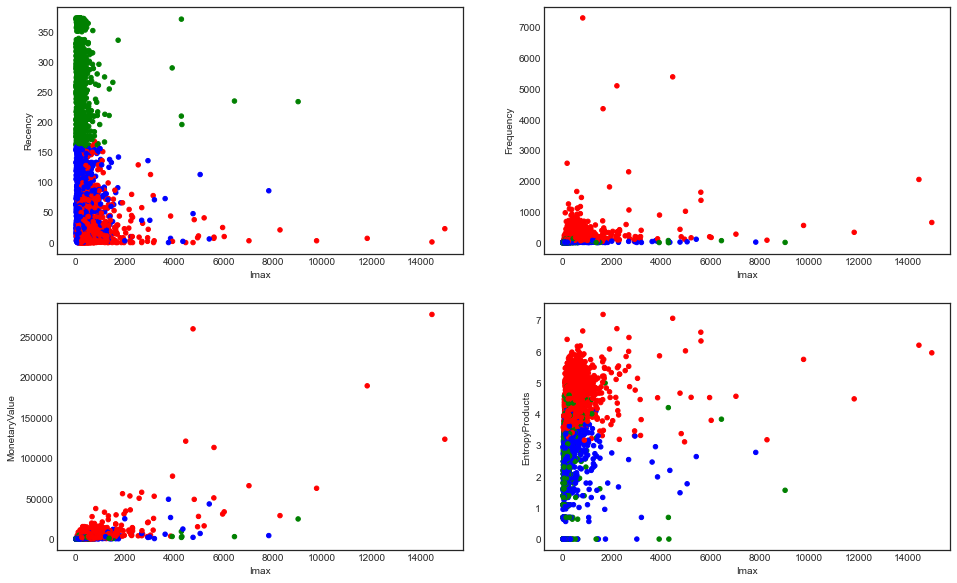

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(16)
axes[0,0].scatter(clienti['Imax'], clienti['Recency'], c=c, s=20)
axes[0,0].set(xlabel='Imax', ylabel ='Recency')

axes[0,1].scatter(clienti['Imax'], clienti['Frequency'], c=c, s=20)
axes[0,1].set(xlabel='Imax', ylabel ='Frequency')

axes[1,0].scatter(clienti['Imax'], clienti['MonetaryValue'], c=c, s=20)
axes[1,0].set(xlabel='Imax', ylabel ='MonetaryValue')

axes[1,1].scatter(clienti['Imax'], clienti['EntropyProducts'], c=c, s=20)
axes[1,1].set(xlabel='Imax', ylabel ='EntropyProducts')

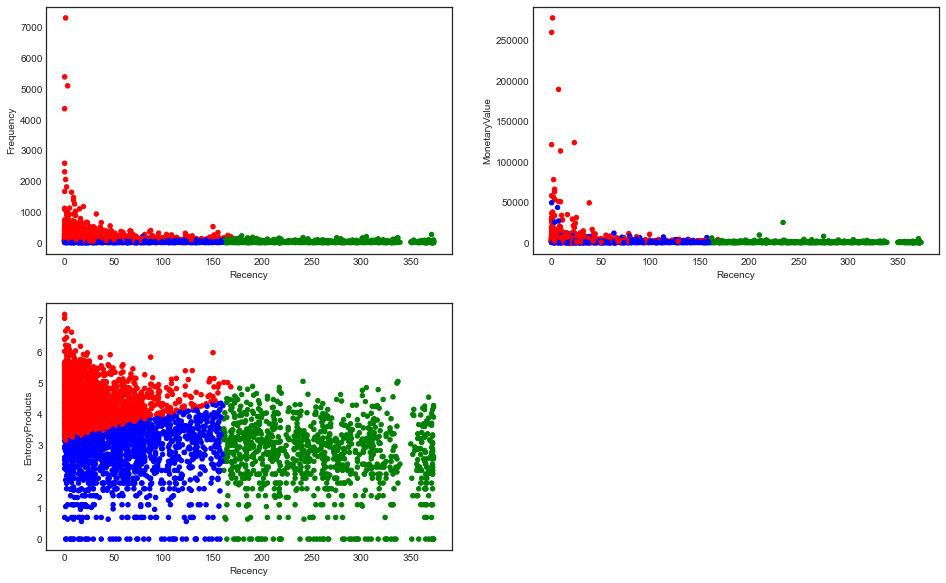

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(16)
axes[0,0].scatter(clienti['Recency'], clienti['Frequency'], c=c, s=20)
axes[0,0].set(xlabel='Recency', ylabel ='Frequency')

axes[0,1].scatter(clienti['Recency'], clienti['MonetaryValue'], c=c, s=20)
axes[0,1].set(xlabel='Recency', ylabel ='MonetaryValue')

axes[1,0].scatter(clienti['Recency'], clienti['EntropyProducts'], c=c, s=20)
axes[1,0].set(xlabel='Recency', ylabel ='EntropyProducts')
fig.delaxes(axes[1][1])

[Text(0, 0.5, 'EntropyProducts'), Text(0.5, 0, 'Frequency')]

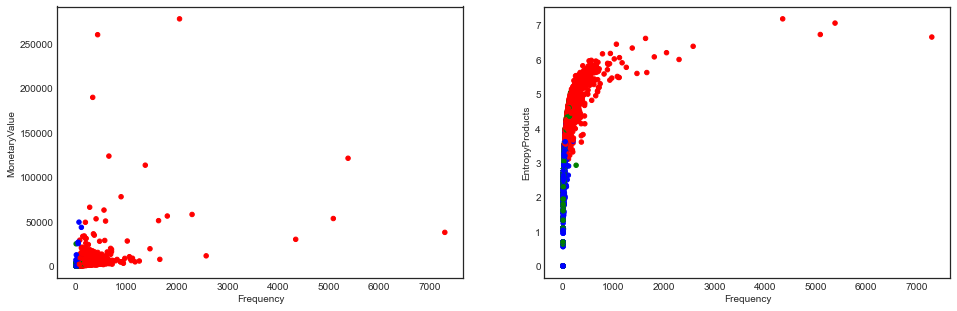

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(16)
axes[0].scatter(clienti['Frequency'], clienti['MonetaryValue'], c=c, s=20)
axes[0].set(xlabel='Frequency', ylabel ='MonetaryValue')

axes[1].scatter(clienti['Frequency'], clienti['EntropyProducts'], c=c, s=20)
axes[1].set(xlabel='Frequency', ylabel ='EntropyProducts')

[Text(0, 0.5, 'EntropyProducts'), Text(0.5, 0, 'MonetaryValue')]

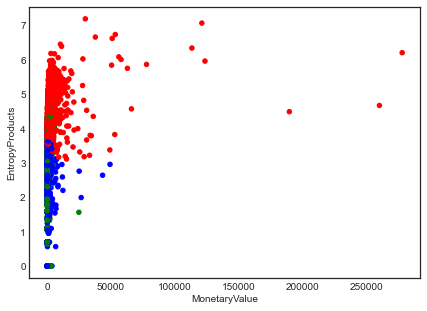

In [80]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(5)
fig.set_figwidth(7)
axes.scatter(clienti['MonetaryValue'], clienti['EntropyProducts'], c=c, s=20)
axes.set(xlabel='MonetaryValue', ylabel ='EntropyProducts')

Dagli scatter plot si nota che per alcune coppie di attributi i punti appartententi a due cluster sembrano formare due agglomerati distinti, senza avere tuttavia una separazione netta. Mentre per altri attributi non risulta esserci nessuna separazione.

## KMeans su dataframe aventi 3 attributi

In [110]:
# Imax, Recency, Frequency
df_1 = clienti.drop(columns=['MonetaryValue', 'EntropyProducts'])

# Imax, Recency, MonetaryValue
df_2 = clienti.drop(columns=['Frequency', 'EntropyProducts'])

# Imax, Recency, EntropyProducts
df_3 = clienti.drop(columns=['Frequency', 'MonetaryValue'])

# Imax, Frequency, MonetaryValue
df_4 = clienti.drop(columns=['Recency', 'EntropyProducts'])

# Imax, Frequency, EntropyProducts
df_5 = clienti.drop(columns=['Recency', 'MonetaryValue'])

# Imax, MonetaryValue, EntropyProducts
df_6 = clienti.drop(columns=['Frequency', 'Recency'])

# Recency, Frequency, MonetaryValue
df_7 = clienti.drop(columns=['Imax', 'EntropyProducts'])

# Recency, Frequency, EntropyProducts
df_8 = clienti.drop(columns=['Imax', 'MonetaryValue'])

# Recency, MonetaryValue, EntropyProducts
df_9 = clienti.drop(columns=['Imax', 'Frequency'])

# Frequency, MonetaryValue, EntropyProducts
df_10 = clienti.drop(columns=['Imax', 'Recency'])

result_1_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_1 = scaler.fit_transform(df_1.values)
result_1_kmeans.fit(X_1)
c_1 = [colors[label] for label in result_1_kmeans.labels_]


result_2_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_2 = scaler.fit_transform(df_2.values)
result_2_kmeans.fit(X_2)
c_2 = [colors[label] for label in result_2_kmeans.labels_]


result_3_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_3 = scaler.fit_transform(df_3.values)
result_3_kmeans.fit(X_3)
c_3 = [colors[label] for label in result_3_kmeans.labels_]

result_4_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_4 = scaler.fit_transform(df_4.values)
result_4_kmeans.fit(X_4)
c_4 = [colors[label] for label in result_4_kmeans.labels_]

result_5_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_5 = scaler.fit_transform(df_5.values)
result_5_kmeans.fit(X_5)
c_5 = [colors[label] for label in result_5_kmeans.labels_]

result_6_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_6 = scaler.fit_transform(df_6.values)
result_6_kmeans.fit(X_6)
c_6 = [colors[label] for label in result_6_kmeans.labels_]

result_7_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_7 = scaler.fit_transform(df_7.values)
result_7_kmeans.fit(X_7)
c_7 = [colors[label] for label in result_7_kmeans.labels_]

result_8_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_8 = scaler.fit_transform(df_8.values)
result_8_kmeans.fit(X_8)
c_8 = [colors[label] for label in result_8_kmeans.labels_]

result_9_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_9 = scaler.fit_transform(df_9.values)
result_9_kmeans.fit(X_9)
c_9 = [colors[label] for label in result_9_kmeans.labels_]

result_10_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
X_10 = scaler.fit_transform(df_9.values)
result_10_kmeans.fit(X_10)
c_10 = [colors[label] for label in result_10_kmeans.labels_]


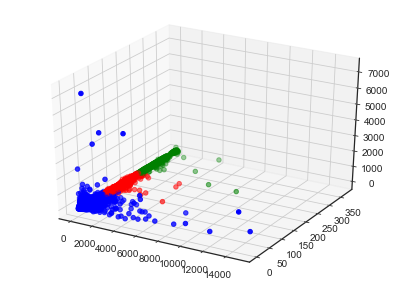

In [111]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_1['Imax'], df_1['Recency'], df_1['Frequency'], c=c_1, s=20)

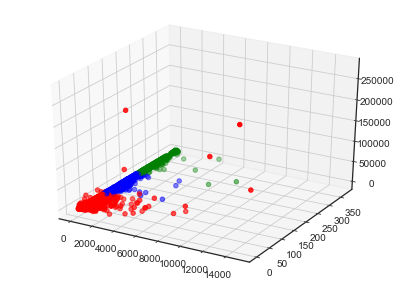

In [109]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_2['Imax'], df_2['Recency'], df_2['MonetaryValue'], c=c_2, s=20)

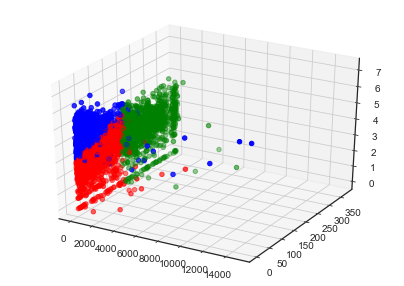

In [112]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_3['Imax'], df_3['Recency'], df_3['EntropyProducts'], c=c_3, s=20)

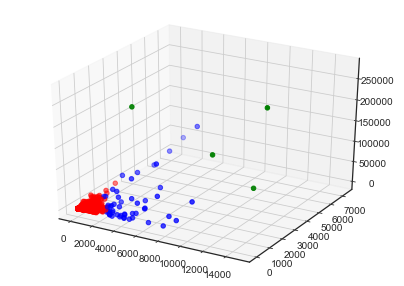

In [113]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_4['Imax'], df_4['Frequency'], df_4['MonetaryValue'], c=c_4, s=20)

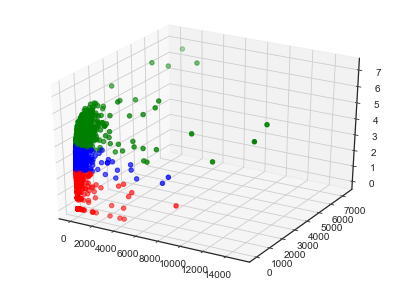

In [114]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_5['Imax'], df_5['Frequency'], df_5['EntropyProducts'], c=c_5, s=20)

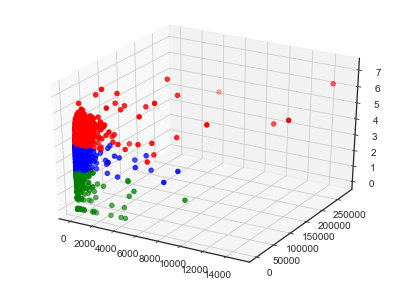

In [115]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_6['Imax'], df_6['MonetaryValue'], df_6['EntropyProducts'], c=c_6, s=20)

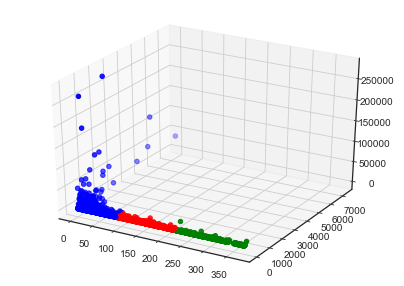

In [116]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_7['Recency'], df_7['Frequency'], df_7['MonetaryValue'], c=c_7, s=20)

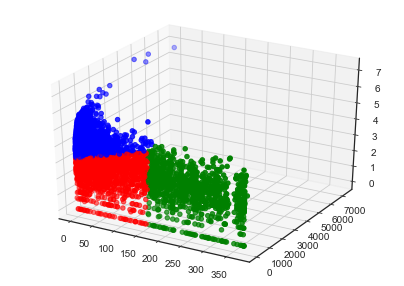

In [117]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_8['Recency'], df_8['Frequency'], df_8['EntropyProducts'], c=c_8, s=20)

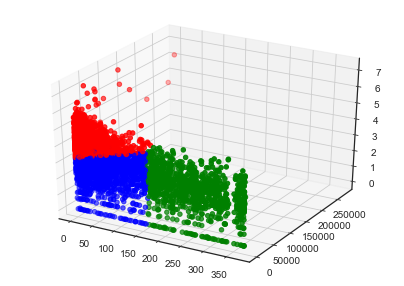

In [118]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_9['Recency'], df_9['MonetaryValue'], df_9['EntropyProducts'], c=c_9, s=20)

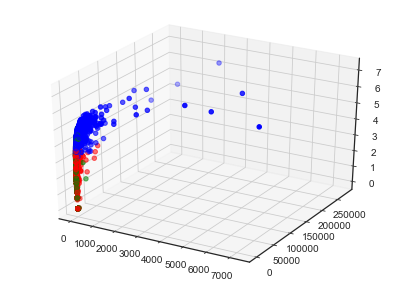

In [119]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(7)
ax= fig.add_subplot(projection='3d')
ax.scatter(df_10['Frequency'], df_10['MonetaryValue'], df_10['EntropyProducts'], c=c_10, s=20)

## Knee Method per stimare il miglior valore di eps

Prima di eseguire l'algoritmo DBSCAN, cerchiamo di stimare il valore migliore di eps usando il knee method.

In [82]:
from scipy.spatial.distance import pdist, squareform

In [83]:
# Calcoliamo la matrice delle distanze usando il vettore delle distanze
distances_matrix = squareform(data_distance)

In [84]:
# Questa funzione restituisce una lista contentente le distanze rispetto al k-esimo vicino
def calculate_kth_distances(distances_matrix, k):
    kth_distances = list()
    for d in distances_matrix:
        index_kth_distance = np.argsort(d)[k]
        kth_distances.append(d[index_kth_distance])
    return kth_distances
# Proviamo diversi valori di k
k_list = [5, 7, 9, 11, 13]
# Dizionario che associa il valore di k con le sue rispettive distanze. Esempio: {2 : 2th_distances, 3: 3th_distances, ...}
distances = dict()
# Calcoliamo le kth_distances per ogni valore di k
for k in k_list:
    distances[k] = calculate_kth_distances(distances_matrix, k)

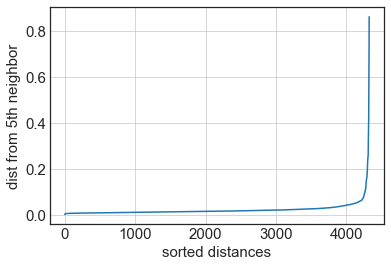

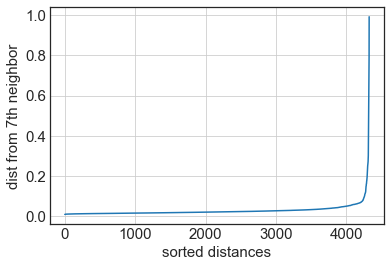

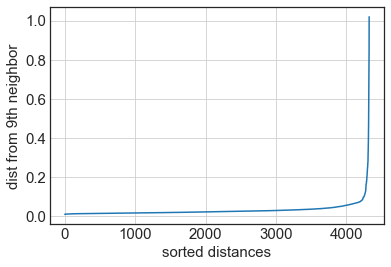

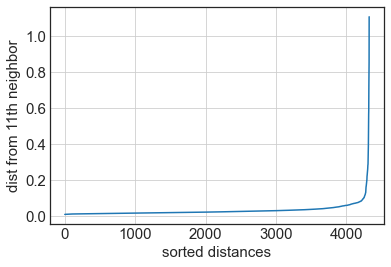

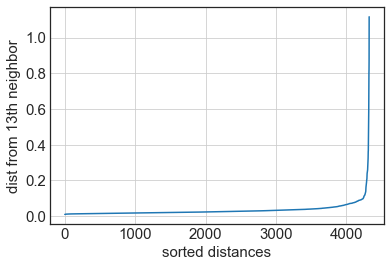

In [85]:
# Plottiamo i grafici
for k in k_list:
    kth_distances = distances[k]
    plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
    plt.ylabel('dist from %sth neighbor' % k, fontsize=15)
    plt.xlabel('sorted distances', fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=15)
    plt.grid()
    plt.show()

Dai grafici ottenuti abbiamo ricavato i seguenti a valori di epsilon:
- Per K = 5, epsilon = 0.15
- Per K = 7, epsilon = 0.15
- Per K = 9, epsilon = 0.2
- Per K = 11, epsilon = 0.2
- Per K = 13, epsilon = 0.2

## DBSCAN

In [86]:
from sklearn.cluster import DBSCAN

In [87]:
# Questo dizionario contiene valore di K -> valore di epsilon stimato dai grafici 
dictonary = {
    5 : 0.15,
    7 : 0.15,
    9 : 0.2,
    11: 0.2,
    13: 0.2
}

for k in dictonary:
    epsilon = dictonary[k]
    dbscan = DBSCAN(eps=epsilon, min_samples=k)
    dbscan.fit(X)
    result = np.unique(dbscan.labels_, return_counts=True)
    print("K = ", k)
    print("Epsilon: ", epsilon)
    print("Numero di cluster: ", len(result[0]))
    print("Dimensione dei cluster: ", result[1])
    if result[0][0] == -1:
        print("Il cluster con ", result[1][0], "elementi è considerato rumore (label -1)")
    print("Silhouette: ", silhouette_score(X, dbscan.labels_))
    print("**********************************************")


K =  5
Epsilon:  0.15
Numero di cluster:  2
Dimensione dei cluster:  [  28 4296]
Il cluster con  28 elementi è considerato rumore (label -1)
Silhouette:  0.5291097973923601
**********************************************
K =  7
Epsilon:  0.15
Numero di cluster:  2
Dimensione dei cluster:  [  28 4296]
Il cluster con  28 elementi è considerato rumore (label -1)
Silhouette:  0.5291097973923601
**********************************************
K =  9
Epsilon:  0.2
Numero di cluster:  2
Dimensione dei cluster:  [  21 4303]
Il cluster con  21 elementi è considerato rumore (label -1)
Silhouette:  0.5678381133396367
**********************************************
K =  11
Epsilon:  0.2
Numero di cluster:  2
Dimensione dei cluster:  [  21 4303]
Il cluster con  21 elementi è considerato rumore (label -1)
Silhouette:  0.5678381133396367
**********************************************
K =  13
Epsilon:  0.2
Numero di cluster:  2
Dimensione dei cluster:  [  22 4302]
Il cluster con  22 elementi è considerat

Facendo DBSCAN con diversi parametri di K e epsilon, abbiamo che otteniamo un unico cluster e alcuni elementi che sono considerati rumore.